<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Mason_Notes_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

In [0]:
answers: https://github.com/austinlasseter/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Solutions.ipynb


## Recap: t-tests

In [0]:
# imports
from scipy.stats import ttest_ind, ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [8]:
# Remove null values as these will throw off the ttest
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
print(df.shape)
df.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# salary values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df = df.dropna(how='any')

In [10]:
df.shape

(30162, 15)

In [11]:
# salary values
df['salary'].value_counts()

 <=50K    22654
 >50K      7508
Name: salary, dtype: int64

In [12]:
# data cleaning
df['salary'].value_counts().index
# leading space inbetween each

Index([' <=50K', ' >50K'], dtype='object')

In [14]:
## what is the average age?
popmean = df['age'].mean()
print(popmean)

38.437901995888865


In [16]:
# restrict to high earners
hibucks = df[df['salary']==' >50K']

hibucks.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [17]:
# is age continuous?
df['age'].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [20]:
# is the average age of high earners above the population average? yes.
ttest_1samp(hibucks['age'], popmean, nan_policy='omit')

Ttest_1sampResult(statistic=46.584490111990384, pvalue=0.0)

In [30]:
# is there a sig difference between the age of high and low earners? yes.
lobucks = df[df['salary']==' <=50K']
lobucks.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
print(lobucks['age'].mean())
print(hibucks['age'].mean())
# is this difference occuring by change?

36.60806038668668
43.95911028236548


In [35]:
ttest_ind(hibucks['age'], lobucks['age'], nan_policy='omit')
# no, this is not happening by chance 

Ttest_indResult(statistic=43.31437788497932, pvalue=0.0)

In [0]:
# subset male and female low earners
lobucks_male = df[(df['salary']==' <=50K') & (df['sex']==' Male')]
lobucks_female = df[(df['salary']==' <=50K') & (df['sex']==' Female')]


# note the trailing space.

In [40]:
# how old are they
# use mean
df['sex'].value_counts().index[0]

' Male'

In [39]:
# is there a sig difference between the male and female low earners? yes.
ttest_ind(lobucks_male['age'], lobucks_female['age'])

Ttest_indResult(statistic=3.3132173169084167, pvalue=0.0009237379001849086)

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
gap = pd.crosstab(df['sex'], df['salary'])

In [53]:
# consider a crosstab. Are men and women equally distributed by salary?
pd.crosstab(df['sex'], df['salary'], margins=True, normalize='index') # normalize turns to percents


salary,<=50K,>50K
sex,,
Female,0.886322,0.113678
Male,0.686163,0.313837
All,0.751078,0.248922


In [55]:
# can we test that?
from scipy.stats import chisquare # one way chi square
chisquare(gap, axis=None)

Power_divergenceResult(statistic=11329.481466746236, pvalue=0.0)

In [0]:
 # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation


In [57]:
# example using simple fake data that is independent 
ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)

# let's run a chi square test
print(chisquare(ind_obs, axis=None))
# high p value meaning that the sample columsn are indpendent of one another

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)


In [60]:
# here's another exmaple of DEPENDENT observations
dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)

[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]


In [61]:
# chi square test
print(chisquare(dep_obs, axis=None))

Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


#Test of Normalcy

In [0]:
mu, sigma = 0,1
sample = np.random.normal(mu, sigma, 1000)

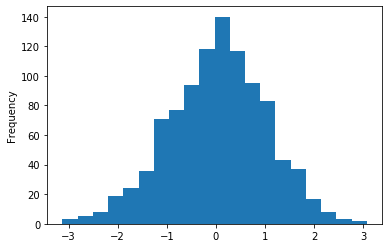

In [65]:
# display sample 
sample = pd.Series(sample)
sample.plot(kind='hist', bins=20);

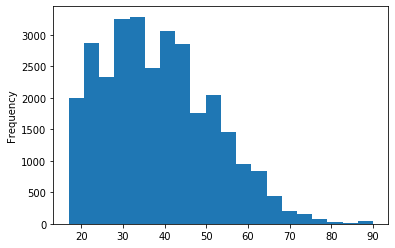

In [62]:
# Is a distribution normal? This is a poisson distribution
df['age'].plot(kind='hist', bins=20);

In [68]:
# Is it normal?
from scipy.stats import normaltest
normaltest(df['age'])

NormaltestResult(statistic=1281.0624702903629, pvalue=6.619407074534328e-279)

In [69]:
# print(f'{var:.15f}'(normaltest(df['age']).pvalue))

NameError: ignored

In [71]:
# mean, std dev, number of obs
sample1 = np.random.normal(5, 25, 1000) # mean, std dev, number of obs
print(normaltest(sample1))  # Pretty clearly  normal


# Pretty clearly  normal

NormaltestResult(statistic=2.6938550755956503, pvalue=0.2600379914192825)


In [0]:
# display that!


In [70]:
# Poisson models arrival times and is related to the binomial (coinflip)
fishsample = np.random.poisson(5, 1000)
normaltest(fishsample)

# Pretty clearly not normal

NormaltestResult(statistic=37.728099584906765, pvalue=6.418702821066205e-09)

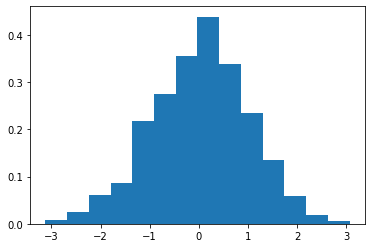

In [72]:
# display that!
count, bins, ignored = plt.hist(sample, 14, density=True)
plt.show()

And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Central Limit Theorem



In [73]:
# Flip a coin.
np.random.binomial(n=1, p=.5)

1

In [80]:
# Let me flip a coin twelve times.
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

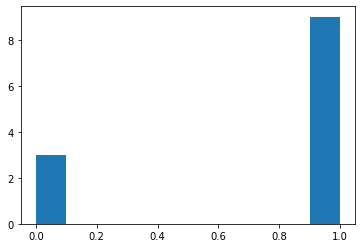

In [81]:
# show that.
plt.hist(coinflips);

In [82]:
# what is the mean of this sample of coinflips?
coinflips.mean()

0.75

In [0]:
# what if I do it again?
coinflips = np.random.binomial(n=1, p=.5, size=1000)


In [85]:
# and the mean? # why are these means different? shouldn't it be the same at .5 for a fair coin?

coinflips.mean()

0.54

In [86]:
coinflips = np.random.binomial(n=1, p=.5, size=10000)
coinflips.mean() # the more the closer you get to the true mean

0.5001

**each of these 'samples' is an estimate of the distribution.** . 
https://www.youtube.com/watch?v=Kq7e6cj2nDw

In [88]:
# take 3000 samples of size 12, and make a list of their means.
# [np.random.binomial(n=1, p=.5, size=12) for x in range(3000)]
sample_means = []
for x in range(0, 3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  sample_means.append(coinflips.mean())

print(len(sample_means))

3000


In [91]:
# look at the first 10 means.
sample_means[:10]

[0.5833333333333334,
 0.4166666666666667,
 0.5,
 0.4166666666666667,
 0.4166666666666667,
 0.3333333333333333,
 0.5833333333333334,
 0.25,
 0.6666666666666666,
 0.4166666666666667]

In [93]:
# make a df of one sample
coin_df = pd.DataFrame({'single_sample': coinflips})
coin_df.head

<bound method NDFrame.head of     single_sample
0               1
1               0
2               1
3               0
4               0
5               0
6               1
7               0
8               0
9               0
10              0
11              0>

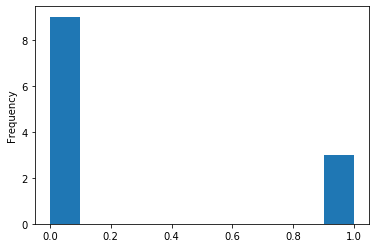

In [94]:
# this df is clearly a binomial distribution (one and zero are the only options)
coin_df['single_sample'].plot(kind='hist');

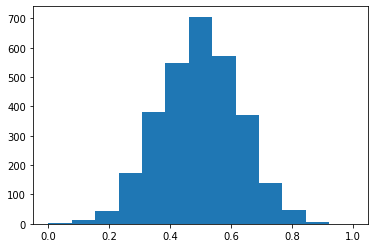

In [95]:
# now plot all 3000 sample means
plt.hist(sample_means, bins=13);

In [96]:
# is this a normal distribution?
normaltest(sample_means) # normal because pvalue is higher than .05

NormaltestResult(statistic=2.8141124605092553, pvalue=0.24486304364873118)

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [97]:
# let's pretend each sample included 100 coin flips, not just 12.
sample_means = []
for x in range(0,3000):
    coinflips = np.random.binomial(n=1, p=.5, size=100)
    one_sample = coinflips
    sample_means.append(coinflips.mean())
# the higher my sample size, the closer I get to .5!
print(len(sample_means))
print(sample_means[:10])

3000
[0.58, 0.45, 0.46, 0.44, 0.48, 0.51, 0.38, 0.57, 0.53, 0.53]


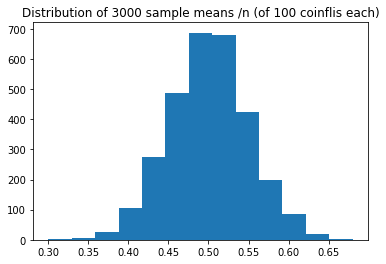

In [98]:
# when I plot, it gets a little taller and a little narrower!
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means /n (of 100 coinflis each)');

This outcome is what we call the Central Limit Theorem. No matter the distribution of my underlying data, the distribution of the estimates will be distributed normally.

In [99]:
# Compare sets of small and large samples
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
    coinflips_small = np.random.binomial(n=1, p=.5, size=20)
    coinflips_large = np.random.binomial(n=1, p=.5, size=100)
    one_small_sample = coinflips_small
    one_small_large = coinflips_large
    sample_means_small.append(coinflips_small.mean())
    sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small[:10])

3000
[0.5, 0.45, 0.45, 0.35, 0.7, 0.65, 0.5, 0.55, 0.5, 0.7]


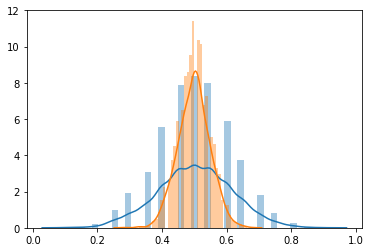

In [100]:
# Plot that for comparison: it gets taller, narrower, and more normal.
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
    sns.distplot(sample)

## Confidence Interval

![source](https://www.mathsisfun.com/data/images/ci95.gif)

With 95% confidence, the population mean is within these bounds. This is the [margin of error](https://www.monmouth.edu/polling-institute/reports/monmouthpoll_ia_111219/) we often seen in political polls.

Between the upper and lower bounds we can find 95% of the sample means.

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

s = standard deviation of the sample  
n = sample size  
t = test statistic  
X = sample mean
  
As sample size goes up, the standard error (i.e., the spread of our error) gets tighter.

In [0]:
# bring in the stats module (for the t-statistic)
import scipy.stats as stats

In [0]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data_array = np.array(data)
    data_mean = np.mean(data)
    n = len(data)
    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n -1) # just looking up the corresponding t-stat 
    # moe = margin of error (standard error * stats t stat )
    return (data_mean, data_mean - moe, data_mean + moe)


In [106]:
# what's the conf interval for a sample of 500 coin flips?
coinflips = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(coinflips)

# mean, upper bound, lower bound.
# We are 95% confident that the mean of our POPULATION is somewhere between .45 and .54

(0.498, 0.45402366836466523, 0.5419763316353348)

# example of political polling results 
45% of sampled Americans voted for Teddy Roosevelt
margin of error was 3% on that sample
Between 42 to 48% percent of ALL AMERICANS voted for Teddy

In [109]:
# try this again. It should capture the mean 95% of the time.
coinflips = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(coinflips)
# mean is a little lower and the window is smaller

(0.512, 0.4680359836589505, 0.5559640163410495)

We want the t-statistic that corresponds to the probability cut off for a given t distribution  (a distribution with a certain 'degrees of freedom').  
`stats.t.ppf` is just looking up the corresponding t-statistic.

**Degrees of freedom**  
degrees of freedom equals the number of "observations" minus the number of required relations among the observations (e.g., the number of parameter estimates). For a 1-sample t-test, one degree of freedom is spent estimating the mean, and the remaining n - 1 degrees of freedom estimate variability.
https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics

**Looking at stats.t.ppf**

In [110]:
# stats.t.ppf(# probability cutoff, # degrees of freedom)

# 95% confidence level -> .025

# 1 - confidence_level == .05 / 2 -> .025

confidence_level = .95
dof = 42-1
stats.t.ppf((1 + confidence_level) / 2, dof)

2.0195409639828936

## Graphically Represent a Confidence Interval

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

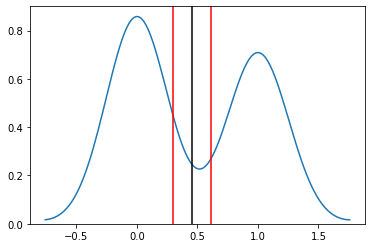

In [112]:
# fake data - one samle of 42 coin flips
coinflips_42 = np.random.binomial(n=1, p=.5, size=42)
# kernel density estimate
sns.kdeplot(coinflips_42)
CI = confidence_interval(coinflips_42)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

In [0]:
# fake data - 50 samples of 12 coin flips
sample_means = []
for x in range(0, 50):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  sample_means.append(coinflips.mean())


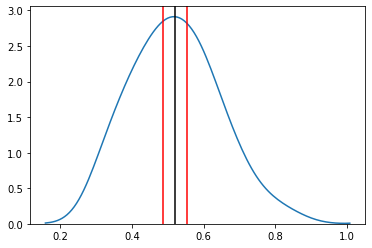

In [114]:
# kernel density estimate
sns.kdeplot(sample_means)
CI = confidence_interval(sample_means)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

In [0]:
# reusable code 
def plot_confidence_interval(data, confidence=0.95):
    sns.kdeplot(data)
    CI = confidence_interval(data, confidence)
    plt.axvline(x=CI[1], color='red')
    plt.axvline(x=CI[0], color='k')
    plt.axvline(x=CI[2], color='red')
    plt.show()

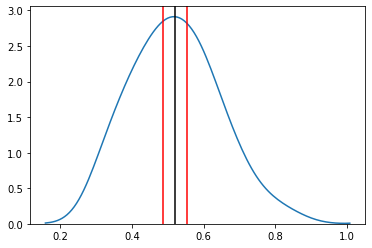

In [122]:
plot_confidence_interval(sample_means, confidence=0.95)

In [0]:
# didn't get to a couple lines


## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp, ttest_ind

**Note that scipy has a built-in function to calculate the confidence interval**   
t.interval

In [0]:
flip_means=[]
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  flip_means.append(coinflips.mean())


**Rebuild the earlier function**
but using `t.interval` instead.

In [0]:
# Sample Size
n = len(flip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
big_mean = np.mean(flip_means)
# Sample Standard Deviation
sample_std = np.std(flip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

In [135]:
# conf int
CI = t.interval(.95, dof, loc=big_mean, scale=std_err)
CI

(0.47985490299191597, 0.5148117636747507)

In [142]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval

"You can roll your own CI calculation pretty easily. \nThe only thing that's a little bit challenging \nis understanding the t stat lookup"

A null hypothesis that's just inside of our confidence interval == fail to reject



In [143]:
# pick a value for my null hypothesis and check the p-value
print(CI)
ttest_1samp(flip_means, .492)

(0.47985490299191597, 0.5148117636747507)


Ttest_1sampResult(statistic=0.6054599984856648, pvalue=0.5462588928834712)

In [144]:
# what if I pick a null hypothesis that's just outside of our confidence interval? 
ttest_1samp(flip_means, .4818927)

Ttest_1sampResult(statistic=1.752878593990813, pvalue=0.08271848116849839)

In [0]:
# I would only see this 5% of the time, so it's unlikely and I reject the null hypothesis.
# A comparison of what we EXPECT and what we OBSERVE.

## Chi Squared Test $\chi^{2}$

A test for dependence of categorical variables. (ie, are they correlated?)

In [147]:
# read back in the earlier data.
adult_df = pd.read_csv(url, na_values=' ?')
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [148]:
# just the numeric columns
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [149]:
# just the non-numeric columns (ie, categorical)
adult_df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [150]:
# how to convert a numerical variable to a categorical 
adult_df['hours-per-week'].describe()


count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [155]:
# create some binned categories 
cut_points 

[0, 9, 19, 29, 39, 49, 1000]

In [0]:
# cut! 
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['few', 'tens', 'twenties', 'thirties', 'forties', 'fifty+']
adult_df['hours-per-week-cats'] = pd.cut(adult_df['hours-per-week'], cut_points, labels=label_names)


In [164]:
# see that
adult_df['hours-per-week-cats'].value_counts().sort_index()

few           458
tens         1246
twenties     2392
thirties     3667
forties     18336
fifty+       6462
Name: hours-per-week-cats, dtype: int64

In [165]:
# sex
adult_df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
# binned category
# we did this

In [167]:
# crosstaab
x_table = pd.crosstab(adult_df['sex'], adult_df['hours-per-week-cats'], margins=True)
x_table

hours-per-week-cats,few,tens,twenties,thirties,forties,fifty+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [168]:
# create a set of female counts
f_count = x_table.iloc[0][0:6]
f_count

hours-per-week-cats
few          235
tens         671
twenties    1287
thirties    1914
forties     5636
fifty+      1028
Name:  Female, dtype: int64

In [169]:
# create a set of male counts
m_count = x_table.iloc[1][0:6].values
m_count

array([  223,   575,  1105,  1753, 12700,  5434])

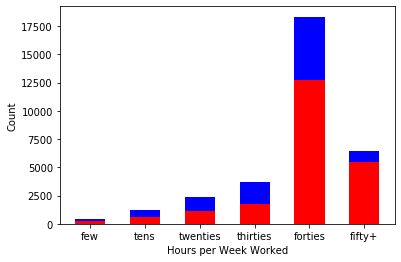

In [170]:
#Plots the bar chart
p1 = plt.bar(label_names, m_count, 0.55, color='r')
p2 = plt.bar(label_names, f_count, 0.55, color='b', bottom=m_count)
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [172]:
x_table

hours-per-week-cats,few,tens,twenties,thirties,forties,fifty+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [171]:

row_sums = x_table.iloc[0:2, 6].values
col_sums = x_table.iloc[2, 0:6].values
print(row_sums)
(col_sums)

[10771 21790]


array([  458,  1246,  2392,  3667, 18336,  6462])

In [173]:
total = x_table.loc['All', 'All']
total

32561

In [178]:
adult_df.shape

(32561, 16)

In [0]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)

In [184]:
# what does the expected distribution look like? 
print(expected[0])  
print(expected[1])

[ 151.50388502  412.16995793  791.26046497 1213.02346365 6065.44811277
 2137.59411566]
[  306.49611498   833.83004207  1600.73953503  2453.97653635
 12270.55188723  4324.40588434]


In [180]:
observed = pd.crosstab(adult_df['sex'], adult_df['hours-per-week-cats']).values
print(observed.shape)
observed


(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [0]:
def chi2(observed, expected):
    return ((observed - expected)**2 / (expected)).sum()

In [0]:
observed_totals = pd.crosstab(
    adult_df['sex'], adult_df['hours-per-week-cats'], margins=True)
observed = pd.crosstab(adult_df['sex'], adult_df['hours-per-week-cats']).values

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [185]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared_stat = ((observed - expected) **2/ (expected)).sum()
print(f"Chi-Squared: {chi_squared_stat}")

Chi-Squared: 2287.190943926107


In [186]:
# Degrees of Freedom of a Chi-squared test
dof = (len(row_sums)-1)*(len(col_sums)-1)
dof
#degrees_of_freedom = (num_rows - 1)(num_columns - 1)


# Calculate Degrees of Freedom


5

## Run a $\chi^{2}$ Test using Scipy

In [193]:
stats.chi2_contingency(observed)


(2287.190943926107,
 0.0,
 5,
 array([[  151.50388502,   412.16995793,   791.26046497,  1213.02346365,
          6065.44811277,  2137.59411566],
        [  306.49611498,   833.83004207,  1600.73953503,  2453.97653635,
         12270.55188723,  4324.40588434]]))

Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex.

### Another example

In [196]:
pd.crosstab(adult_df['sex'], adult_df['salary'])

salary,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [194]:
# sex and salary
observed = pd.crosstab(adult_df['sex'], adult_df['salary']).values
observed 

array([[ 9592,  1179],
       [15128,  6662]])

In [195]:
# chi square test
stats.chi2_contingency(observed)

(1517.813409134445, 0.0, 1, array([[ 8177.24025675,  2593.75974325],
        [16542.75974325,  5247.24025675]]))

In [0]:
# age and salary

In [0]:
# crosstab

In [0]:
# chi square test